# Introduction
Basic statistic for beginners
* [Histogram]
* [Outliers]
* [Box Plot ]
* [Summary Statistics]
* [CDF]
* [Effect size]
* [Relationship Between Variables]
* [Correlation]
* [Covariance]
* [Pearson Correlation]
* [Spearman's Rank Correlation]
* [Mean VS Median]
* [Hypothesis Testing]
* [Normal(Gaussian) Distribution and z-score]


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [4]:
# read data as pandas data frame
data = pd.read_csv("C:/Users/pskj0/Desktop/kaggle/data.csv")
data = data.drop(['Unnamed: 32','id'],axis = 1)

In [6]:
# quick look to data
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
data.shape # (569, 31)
data.columns 

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<a id="1"></a> <br>
## Histogram
* How many times each value appears in dataset. This description is called the distribution of variable
* Most common way to represent distribution of varible is histogram that is graph which shows frequency of each value.
* Frequency = number of times each value appears
* Example: [1,1,1,1,2,2,2]. Frequency of 1 is four and frequency of 2 is three.

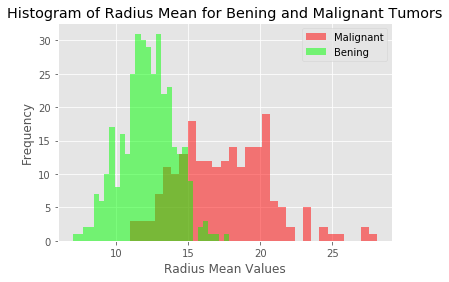

Most frequent malignant radius mean is:  20.101999999999997


In [9]:
m = plt.hist(data[data["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(data[data["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)

* Lets look at other conclusions
* From this graph you can see that radius mean of malignant tumors are bigger than radius mean of bening tumors mostly.
* The bening distribution (green in graph) is approcimately bell-shaped that is shape of normal distribution (gaussian distribution)
* Also you can find result like that most frequent malignant radius mean is  

<a id="2"></a> <br>
## Outliers
* While looking histogram as yok can see there are rare values in bening distribution (green in graph)
* There values can be errors or rare events.
* These errors and rare events can be called outliers.
* Calculating outliers: 
    * first we need to calculate first quartile (Q1)(25%)
    * then find IQR(inter quartile range) = Q3-Q1
    * finally compute Q1 - 1.5*IQR and Q3 + 1.5*IQR
    * Anything outside this range is an outlier
    * lets write the code for bening tumor distribution for feature radius mean

In [11]:
data_bening = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]
desc = data_bening.radius_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
data_bening[data_bening.radius_mean < lower_bound].radius_mean
print("Outliers: ",data_bening[(data_bening.radius_mean < lower_bound) | (data_bening.radius_mean > upper_bound)].radius_mean.values)

Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers:  [ 6.981 16.84  17.85 ]


<a id="3"></a> <br>
## Box Plot 
* You can see outliers also from box plots
* We found 3 outlier in bening radius mean and in box plot there are 3 outlier.

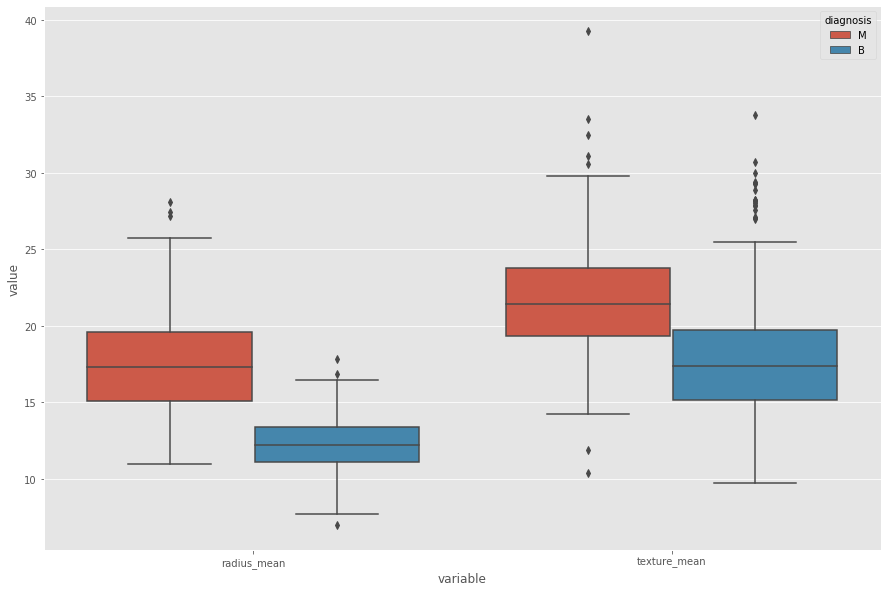

In [12]:
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

<a id="4"></a> <br>
## Summary Statistics
* Mean
* Variance: spread of distribution
* Standart deviation square root of variance
* Lets look at summary statistics of bening tumor radiance mean

In [13]:
print("mean: ",data_bening.radius_mean.mean())
print("variance: ",data_bening.radius_mean.var())
print("standart deviation (std): ",data_bening.radius_mean.std())
print("describe method: ",data_bening.radius_mean.describe())

mean:  12.14652380952381
variance:  3.170221722043872
standart deviation (std):  1.7805116461410389
describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


<a id="5"></a> <br>
## CDF
* Cumulative distribution function is the probability that the variable takes a value less than or equal to x. P(X <= x)
* Lets explain in cdf graph of bening radiues mean
* in graph, what is P(12 < X)? The answer is 0.5. The probability that the variable takes a values less than or equal to 12(radius mean) is 0.5.
* You can plot cdf with two different method

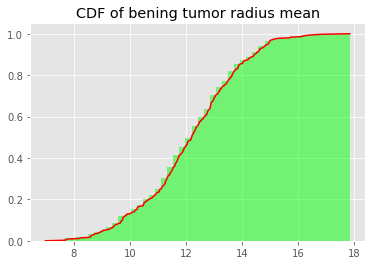

In [14]:
plt.hist(data_bening.radius_mean,bins=50,fc=(0,1,0,0.5),label='Bening',normed = True,cumulative = True)
sorted_data = np.sort(data_bening.radius_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color='red')
plt.title('CDF of bening tumor radius mean')
plt.show()

<a id="6"></a> <br>
## Effect size
* One of the summary statistics.
* It describes size of an effect. It is simple way of quantifying the difference between two groups.
* In an other saying, effect size emphasises the size of the difference
* Use cohen effect size
* Cohen suggest that if d(effect size)= 0.2, it is small effect size, d = 0.5 medium effect size, d = 0.8 large effect size.
* lets compare size of the effect between bening radius mean and malignant radius mean
* Effect size is 2.2 that is too big and says that two groups are different from each other as we expect. Because our groups are bening radius mean and malignant radius mean that are different from each other

In [15]:
mean_diff = data_malignant.radius_mean.mean() - data_bening.radius_mean.mean()
var_bening = data_bening.radius_mean.var()
var_malignant = data_malignant.radius_mean.var()
var_pooled = (len(data_bening)*var_bening +len(data_malignant)*var_malignant ) / float(len(data_bening)+ len(data_malignant))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size: ",effect_size)

Effect size:  2.2048585165041428


<a id="7"></a> <br>
## Relationship Between Variables
* We can say that two variables are related with each other, if one of them gives information about others
* For example, price and distance. If you go long distance with taxi you will pay more. There fore we can say that price and distance are positively related with each other.
* Scatter Plot
* Simplest way to check relationship between two variables
* Lets look at relationship between radius mean and area mean
* In scatter plot you can see that when radius mean increases, area mean also increases. Therefore, they are positively correlated with each other.
* There is no correlation between area mean and fractal dimension se. Because when area mean changes, fractal dimension se is not affected by chance of area mean

<Figure size 1080x720 with 0 Axes>

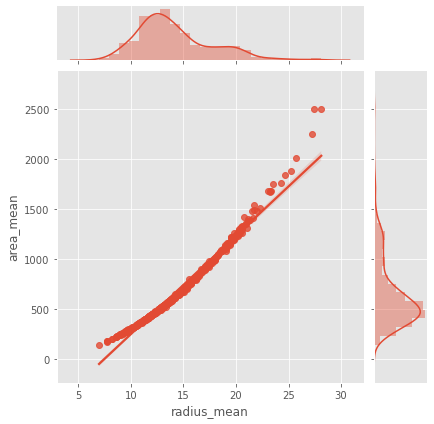

In [16]:
plt.figure(figsize = (15,10))
sns.jointplot(data.radius_mean,data.area_mean,kind="regg")
plt.show()

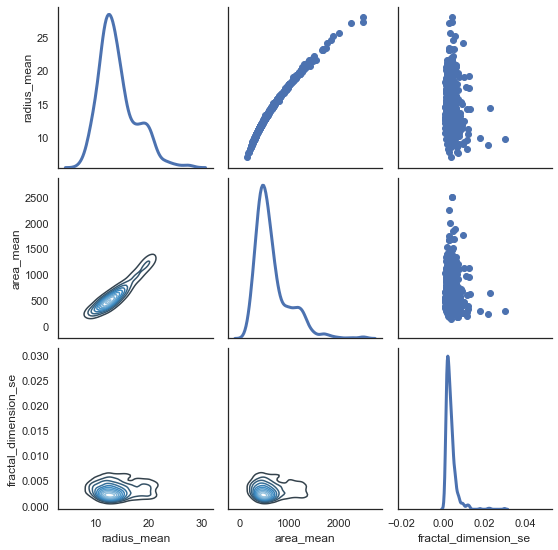

In [17]:
# Also we can look relationship between more than 2 distribution
sns.set(style = "white")
df = data.loc[:,["radius_mean","area_mean","fractal_dimension_se"]]
g = sns.PairGrid(df,diag_sharey = False,)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw =3)
plt.show()

<a id="8"></a> <br>
## Correlation
* Strength of the relationship between two variables
* Lets look at correlation between all features.

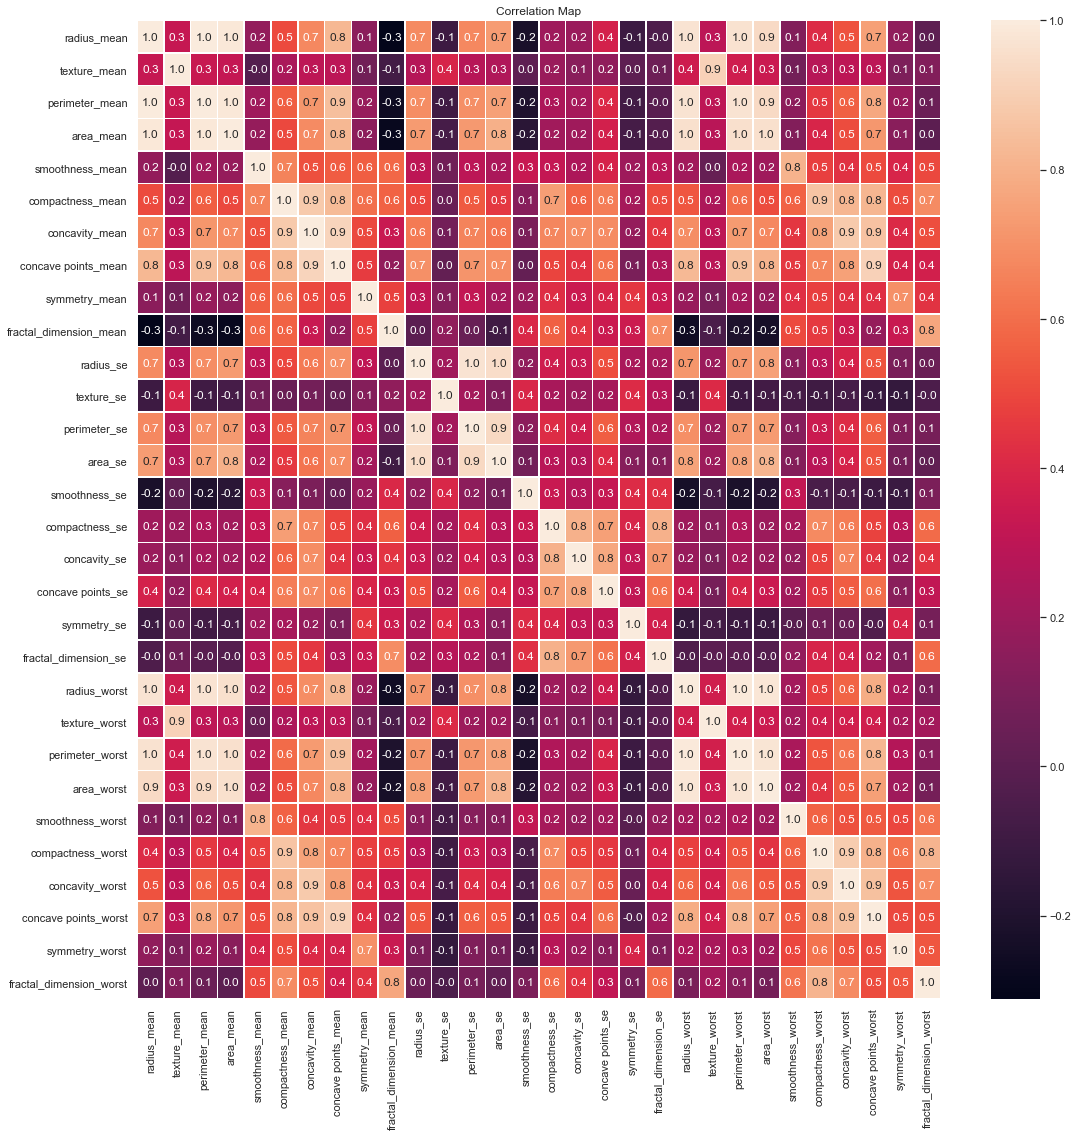

In [19]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

* Huge matrix that includes a lot of numbers
* The range of this numbers are -1 to 1. 
* Meaning of 1 is two variable are positively correlated with each other like radius mean and area mean
* Meaning of zero is there is no correlation between variables like radius mean and fractal dimension se
* Meaning of -1 is two variables are negatively correlated with each other like radius mean and fractal dimension mean.Actually correlation between of them is not -1, it is -0.3 but the idea is that if sign of correlation is negative that means that there is negative correlation.

<a id="9"></a> <br>
## Covariance
* Covariance is measure of the tendency of two variables to vary together
* So covariance is maximized if two vectors are identical
* Covariance is zero if they are orthogonal.
* Covariance is negative if they point in opposite direction
* Lets look at covariance between radius mean and area mean. Then look at radius mean and fractal dimension se


In [20]:
np.cov(data.radius_mean,data.area_mean)
print("Covariance between radius mean and area mean: ",data.radius_mean.cov(data.area_mean))
print("Covariance between radius mean and fractal dimension se: ",data.radius_mean.cov(data.fractal_dimension_se))

Covariance between radius mean and area mean:  1224.4834093464565
Covariance between radius mean and fractal dimension se:  -0.0003976248576440626


<a id="10"></a> <br>
## Pearson Correlation
* Division of covariance by standart deviation of variables
* Lets look at pearson correlation between radius mean and area mean
* First lets use .corr() method that we used actually at correlation part. In correlation part we actually used pearson correlation :) 
* p1 and p2 is the same. In p1 we use corr() method, in p2 we apply definition of pearson correlation (cov(A,B)/(std(A)*std(B)))
* As we expect pearson correlation between area_mean and area_mean is 1 that means that they are same distribution
* Also pearson correlation between area_mean and radius_mean is 0.98 that means that they are positively correlated with each other and relationship between of the is very high.
* To be more clear what we did at correlation part and pearson correlation part is same.


In [21]:
p1 = data.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
p2 = data.radius_mean.cov(data.area_mean)/(data.radius_mean.std()*data.area_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson correlation:  0.9873571700566128


<a id="11"></a> <br>
## Spearman's Rank Correlation
* Pearson correlation works well if the relationship between variables are linear and variables are roughly normal. But it is not robust, if there are outliers
* To compute spearman's correlation we need to compute rank of each value


In [22]:
ranked_data = data.rank()
spearman_corr = ranked_data.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
print("Spearman's correlation: ")
print(spearman_corr)

Spearman's correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.999602
radius_mean   0.999602     1.000000


* Spearman's correlation is little higher than pearson correlation
    * If relationship between distributions are non linear, spearman's correlation tends to better estimate the strength of relationship
    * Pearson correlation can be affected by outliers. Spearman's correlation is more robust. 

<a id="12"></a> <br>
## Mean VS Median
* Sometimes instead of mean we need to use median. I am going to explain why we need to use median with an example
* Lets think that there are 10 people who work in a company. Boss of the company will make raise in their salary if their mean of salary is smaller than 5


In [23]:
salary = [1,4,3,2,5,4,2,3,1,500]
print("Mean of salary: ",np.mean(salary))

Mean of salary:  52.5


* Mean of salary is 52.5 so the boss thinks that oooo I gave a lot of salary to my employees. And do not makes raise in their salaries. However as you know this is not fair and 500(salary) is outlier for this salary list.
* Median avoids outliers

In [24]:
print("Median of salary: ",np.median(salary))

Median of salary:  3.0


* Now median of the salary is 3 and it is less than 5 and employees will take raise in their sallaries and they are happy and this situation is fair :)

<a id="13"></a> <br>
## Hypothesis Testing
* Classical Hypothesis Testing
* We want to answer this question: "given a sample and a apparent effecti what is the probability of seeing such an effect by chance"
* The first step is to quantify the size of the apparent effect by choosing a test statistic. Natural choice for the test statistic is the difference in means between two groups.
* The second step is to define null hypothesis that is model of the system based on the assumption that the apparent effect is not real. A null hypothesis is a type of hypothesis used in statistics that proposes that no statistical significance exists in a set of given observations. The null hypothesis is a hypothesis which people tries to disprove it. Alternative hypothesis is a hypothesis which people want to tries to prove it. 
* Third step is compute p-value that is probablity of seeing the apparent effect if the null hypothesis is true. Suppose we have null hypothesis test. Then we calculate p value. If p value is less than or equal to a threshold, we reject null hypothesis.
* If the p-value is low, the effect is said to be statistacally significant that means that it is unlikely to have occured by chance. Therefore we can say that the effect is more likely to appear in the larger population.
* Lets have an example. Null hypothesis: world is flatten. Alternative hypothesis: world is round. Several scientists set out to disprove the null hypothesis. This eventually led to the refection of the null hypothesis and acceptance of the alternative hypothesis.
* Other example. "this effect is real" this is null hypothesis. Based on that assumption we compute the probability of the apparent effect. That is the p-value. If p-value is low, we conclude that null hypothesis is unlikely to be true.
* Now lets make our example:
    * I want to learn that are radius mean and area mean related with each other? My null hypothesis is that "relationship between radius mean and area mean is zero in tumor population'.
    * Now we need to refute this null hypothesis in order to demonstrate that radius mean and area mean are related. (actually we know it from our previous experiences)
    * lets find p-value (probability value) 

In [25]:
statistic, p_value = stats.ttest_rel(data.radius_mean,data.area_mean)
print('p-value: ',p_value)

p-value:  1.5253492492559045e-184


* P values is almost zero so we can reject null hypothesis.

<a id="14"></a> <br>
## Normal(Gaussian) Distribution and z-score
* Also called bell shaped distribution
* Instead of making formal definition of gaussian distribution, I want to explain it with an example.
* The classic example is gaussian is IQ score.
    * In the world lets say average IQ is 110.
    * There are few people that are super intelligent and their IQs are higher than 110. It can be 140 or 150 but it is rare.
    * Also there are few people that have low intelligent and their IQ is lower than 110. It can be 40 or 50 but it is rare.
    * From these information we can say that mean of IQ is 110. And lets say standart deviation is 20.
    * Mean and standart deviation is parameters of normal distribution.
    * Lets create 100000 sample and visualize it with histogram.


mean:  110.03627969613659
standart deviation:  20.025612457846133


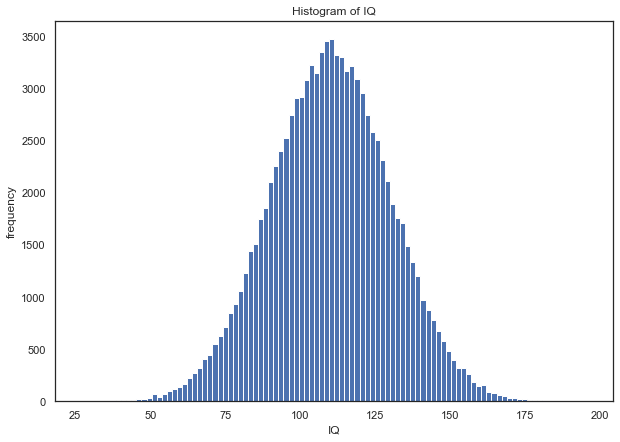

In [26]:
# parameters of normal distribution
mu, sigma = 110, 20  # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)
print("mean: ", np.mean(s))
print("standart deviation: ", np.std(s))
# visualize with histogram
plt.figure(figsize = (10,7))
plt.hist(s, 100, normed=False)
plt.ylabel("frequency")
plt.xlabel("IQ")
plt.title("Histogram of IQ")
plt.show()

* As it can be seen from histogram most of the people are cumulated near to 110 that is mean of our normal distribution
* However what is the "most" I mentioned at previous sentence? What if I want to know what percentage of people should have an IQ score between 80 and 140?
* We will use z-score the answer this question. 
      * z = (x - mean)/std 
      * z1 = (80-110)/20 = -1.5
      * z2 = (140-110)/20 = 1.5
      * Distance between mean and 80 is 1.5std and distance between mean and 140 is 1.5std.
      * If you look at z table, you will see that 1.5std correspond to 0.4332
 <a href="https://ibb.co/hys6OT"><img src="https://preview.ibb.co/fYzWq8/123.png" alt="123" border="0"></a>
      * Lets calculate it with 2 because 1 from 80 to mean and other from mean to 140
      * 0.4332 * 2 = 0.8664
      * 86.64 % of people has an IQ between 80 and 140.
  <a href="https://ibb.co/fhc6OT"><img src="https://preview.ibb.co/bUi2xo/hist.png" alt="hist" border="0"></a>

* What percentage of people should have an IQ score less than 80?
* z = (110-80)/20 = 1.5
* Lets look at table of z score 0.4332. 43.32% of people has an IQ between 80 and mean(110).
* If we subtract from 50% to 43.32%, we ca n find percentage of people have an IQ score less than 80.
* 50-43.32 = 6.68. As a result, 6.68% of people have an IQ score less than 80.